# OBJECTIVE

MAKING EXPLORATORY DATA ANALYSIS (EDA) WITH THE LONDON BIKE SHARE DATASET


In [52]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# IMPORT DATA

In [53]:
# Import Data
df = pd.read_csv('/content/drive/MyDrive/london_merged.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# DATA DICTIONARY

* "timestamp" - timestamp field for grouping the data
* "cnt" - the count of a new bike shares
* "t1" - real temperature in C
* "t2" - temperature in C "feels like"
* "hum" - humidity in percentage
* "windspeed" - wind speed in km/h
* "weathercode" - category of the weather
* "isholiday" - boolean field - 1 holiday / 0 non holiday
* "isweekend" - boolean field - 1 if the day is weekend
* "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
* "weathe_code" category description: 1 = Clear : mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity; 2 = scattered clouds / few clouds; 3 = Broken clouds; 4 = Cloudy; 7 = Rain/ light Rain shower/ Light rain; 10 = rain with thunderstorm; 26 = snowfall; 94 = Freezing Fog

In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


** Note

* Bộ dữ liệu chứa 17.414 dòng dữ liệu, không dòng nào chứa giá trị NULL;
* Cột timestamp đang bị sai định dạng dữ liệu;
* Ngoài ra "t1" - real temperature in C and "t2" - temperature in C "feels like" mang ý nghĩa khá tương đồng --> Cần xem xét thêm mức độ tương quan và drop bớt nếu cần thiết;
* Còn lại bộ dữ liệu đã khá sạch

# TIMESTAMP

In [55]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df= df.set_index('timestamp')

In [57]:
# creates a new column called 'year_month' and fills it with the year and month information extracted from the index of the DataFrame.
# The strftime() function is used to format the datetime objects in the index into a string with the format '%Y-%m', which represents the year and month.

df['year_month']= df.index.strftime('%Y-%m')
df['year'] = df.index.year
df['month']= df.index.month
df['day_of_week']=df.index.dayofweek
df['hour']=df.index.hour

df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_week,hour
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,6,4


# CORRELATION HEATMAP

Kiểm tra mức độ tương quan giữa nhiệt độ và nhiệt độ thực tế

Nếu mức độ tương quan cao --> đa cộng tuyến

<Axes: >

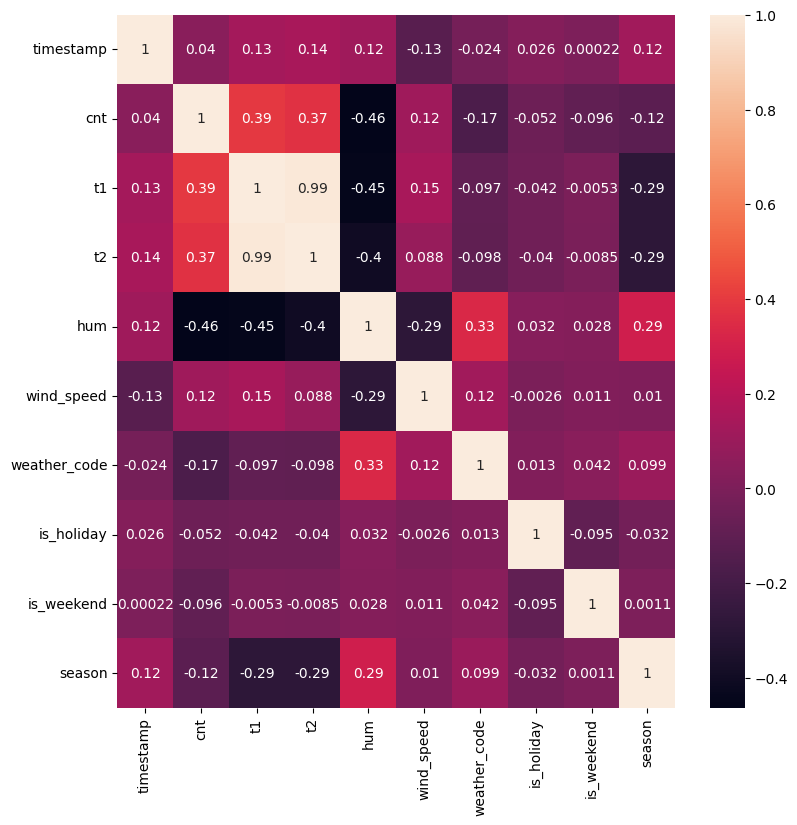

In [9]:
# correlation
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True)

* Correlation rất cao (0.99) --> sẽ chỉ dùng t1

# SEASON

In [13]:
df['season'].value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [14]:
df['season'].value_counts(normalize=True)

season
0.0    0.252326
1.0    0.251924
3.0    0.248651
2.0    0.247100
Name: proportion, dtype: float64

* Các giá trị về mùa trong bộ dữ liệu khá đồng đều nhau
* Số người đi xe đạp không có quá nhiều khác biệt theo mùa

In [17]:
fig = px.bar(x=df['season'].value_counts().index,
             y=df['season'].value_counts().values,
             title='Seasons',
             labels={'y':'Count', 'x':'Seasons'})

fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    width=800,  # Change width as desired
    height=600  # Change height as desired
)
fig.show()

# WEATHER

In [18]:
df['weather_code'].value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [20]:
df['weather_code'].value_counts(normalize=True)

weather_code
1.0     0.353164
2.0     0.231653
3.0     0.203916
7.0     0.122947
4.0     0.084070
26.0    0.003446
10.0    0.000804
Name: proportion, dtype: float64

In [31]:
fig = px.pie(df,
             values=df['weather_code'].value_counts().values,
             names= ['Clear', 'scattered clouds', 'Broken clouds', 'Cloudy' 'Rain', 'rain with thunderstorm', 'snowfall', 'Freezing Fog'])
fig.update_layout(
    width=800,
    height=600
)
fig.update_traces(marker=dict(colors=['#3498db', '#1f77b4', '#3498db', '#2980b9', '#2c3e50', '#8c564b', '#e377c2', '#4682B4']))
fig.show()

** Note

* %35 thời tiết là Clear(1.0)
* %23 thời tiết là 'scattered clouds, few clouds'
* %20 thời tiết là 'broken clouds'
* %12 thời tiết là 'rain, light rain'
* Còn lại là thời tiết xấu như thunderstorm

--> 35% là thời tiết tốt, còn lại là nhiều mây và mưa nhỏ - một kiểu thời tiết khá đặc trưng ở LonDon

# ctn: Count of a New Bike Shares

In [32]:
df['cnt'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

** Note

* Nhận thấy có sự chênh lệch khá đáng kể giữa mean(1143) và median(844)
--> Cần research thêm liệu có phải là outlier không

In [34]:
# Vẽ marginal plot

fig = px.histogram(df,
                   x='cnt',
                   title='Count of New Bike Shares',
                   marginal="box",
                   hover_data=df[['season']])

fig.update_layout(
    width=800,
    height=600
)
fig.update_traces(marker_color='red')
fig.show()

** Note

outliers (trong khoảng từ 5560) đa số tập trung ở mùa 1 (mùa hè)

# t1 - real temperature in C

In [35]:
df['t1'].describe()

count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64

In [38]:
fig = px.histogram(df,
                   x='t1',
                   title='Temperatures',
                   marginal="box",
                   hover_data=df[['season']])

fig.update_layout(
    width=800,
    height=600
)
fig.update_traces(marker_color='orange')
fig.show()

** Note

* Dễ thấy số người đi xe đạp phân bổ tập trung ở mức nhiệt độ từ 10-15
* Phân bổ ít dần về 2 phía đầu cực khi nhiệt độ xuống âm độ C hoặc quá nóng

# WINDSPEED

In [39]:
df['t1'].describe()

count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64

In [41]:
fig = px.histogram(df,
                   x='wind_speed',
                   title='wind speed',
                   marginal="box",
                   hover_data=df[['season']])

fig.update_layout(
    width=800,
    height=600
)
fig.update_traces(marker_color='green')
fig.show()

# Humidity

In [42]:
df['hum'].describe()

count    17414.000000
mean        72.324954
std         14.313186
min         20.500000
25%         63.000000
50%         74.500000
75%         83.000000
max        100.000000
Name: hum, dtype: float64

In [43]:
fig = px.histogram(df,
                   x='hum',
                   title='Humidity',
                   marginal="box",
                   hover_data=df[['season']])

fig.update_layout(
    width=800,
    height=600
)
fig.update_traces(marker_color='purple')
fig.show()

Correlation matrix và mối quan hệ giữa các yếu tố thời tiết đối với number of bike share

In [45]:
df[['cnt','t1','hum','wind_speed','weather_code']].corr()

,cnt,t1,hum,wind_speed,weather_code
cnt,1.000000,0.388798,-0.462901,0.116295,-0.166633
t1,0.388798,1.000000,-0.447781,0.145471,-0.097114
hum,-0.462901,-0.447781,1.000000,-0.287789,0.334750
wind_speed,0.116295,0.145471,-0.287789,1.000000,0.124803
weather_code,-0.166633,-0.097114,0.334750,0.124803,1.000000


In [47]:
index_vals = df['season'].astype('category').cat.codes
# This line creates a new variable index_vals. It first converts the 'season' column of the DataFrame df to a categorical data type using .astype('category'),
# then it extracts the category codes for each value using .cat.codes.
# This will give a numerical representation of each unique value in the 'season' column.
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Number of Bike Share',
                                 values=df['cnt']),
                            dict(label='Temperature',
                                 values=df['t1']),
                            dict(label='Humidity',
                                 values=df['hum']),
                           dict(label='Wind Speed',
                                 values=df['wind_speed'])],
                showupperhalf=False,
                text=df['season'],
                marker=dict(color=index_vals,
                            showscale=False,
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='Bike Share in london',
    width=1000,
    height=1000,
)

fig.show()

** Note

* Nhận thấy mối tương quan thuận yếu giữa nhiệt độ và số lượng bike share
* Ngoài ra mối tương quan nghịch biến và yếu giữa độ ẩm và số lượng bike share


# HOLIDAY

In [48]:
df['is_holiday'].value_counts()

is_holiday
0.0    17030
1.0      384
Name: count, dtype: int64

In [50]:
fig = px.pie(df, values=df['is_holiday'].value_counts().values,
             names= ['Normal Day','Holiday'] )
fig.update_layout(
    width=800,
    height=600
)
fig.show()

# WEEKEND

In [63]:
fig = px.pie(df, values=df['is_holiday'].value_counts().values,
             names= ['Weekday','Weekend'] )
fig.update_layout(
    width=800,
    height=600 )
fig.show()

# BIKE SHARE theo NĂM

In [61]:
fig = px.scatter(df, x="year", y="cnt")
fig.update_layout(
    width=800,
    height=600,
)
fig.update_traces(marker_color='red')
fig.show()

** Note

* Số lượng bike share giảm dần từ 2015 đến 2017

In [65]:
# Chi tiết hơn theo Tháng - năm
fig = px.scatter(df, x="year_month", y="cnt")
fig.update_layout(
    width=800,
    height=600,
)
fig.update_traces(marker_color='red')
fig.show()

** Note

* Có sự biến động giảm ở các tháng mùa đông và tăng trở lại vào các tháng mùa hè

# BIKE SHARE BY HOLIDAY

In [77]:
holiday = df.groupby('is_holiday')['cnt'].mean().reset_index().rename(columns={'is_holiday': 'Holiday', 'cnt': 'Number of Bike Shared'})
holiday['Holiday'] = holiday['Holiday'].replace({0: 'Normal Day', 1: 'Holiday'})

fig = px.bar(holiday, x='Holiday', y='Number of Bike Shared', color='Holiday')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_layout(
    width=800,
    height=600,
)
# Define a list of colors for each bar
colors = ['blue', 'green']  # Adjust the list according to the number of bars

# Assign colors to each bar
for i, color in enumerate(colors):
    fig.data[i].marker.color = color

fig.show()

** Note

* Dễ hiểu Normal days có nhiều bike share hơn là holidays.
* Xu hướng tương tự đối với WEEKEND

# BIKE SHARE THEO WEEKEND

In [78]:
weekend = df.groupby('is_weekend')['cnt'].mean().reset_index().rename(columns={'is_weekend': 'Weekend', 'cnt':'Number of Bike Shared'}, )
weekend['Weekend']= weekend['Weekend'].replace({0: 'Weekday', 1:'Weekend'})

fig = px.bar(weekend, x='Weekend', y= 'Number of Bike Shared', color='Weekend', )
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(
    width=800,
    height=600,
)
# Define a list of colors for each bar
colors = ['red', 'blue']  # Adjust the list according to the number of bars

# Assign colors to each bar
for i, color in enumerate(colors):
    fig.data[i].marker.color = color
fig.show()

# BIKE SHARE BY HOUR, HOLIDAY OR NOT

In [79]:
fig = px.scatter(df, x="hour", y="cnt", color='is_holiday')
fig.update_layout(
    width=800,
    height=600,
)
fig.show()

** Note
* Vào buổi sáng giờ cao điểm đi làm của người dân 8-10h và giờ tan tầm từ 17-18h vào buổi chiều khi người dân đi làm về là thời điểm số lượng bike share đạt đỉnh


# BIKE SHARE BY HOUR, WEEKEND OR NOT

In [80]:
fig = px.scatter(df, x="hour", y="cnt", color='is_weekend')
fig.update_layout(
    width=800,
    height=600,
)
fig.show()

** Note

* Cuối tuần thời điểm giữa 10-16h đạt đỉnh của số lượng bike share


# BIKE SHARE THEO THỨ TRONG TUẦN

In [81]:
fig = px.scatter(df, x="day_of_week", y="cnt", color='is_weekend', hover_data = df[['hour']])
fig.update_layout(
    width=800,
    height=600,
)
fig.show()

** Note

* Ngoại trừ thứ 5, các ngày trong tuần có số lượng bike share KHÁ ĐỒNG ĐỀU